# 0. Imports

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

# 1. Sensitivity Analysis

## 1.1 Input Data (premises)

In [22]:
ebitda2021 = 4678521.0 # in thousands
dl_ebitda = 0.31
shares = 4200000 # in thousands
growth_rate = range(5, 20, 1)
exit_multiple = range(10, 20, 1)
t = 5 # years of forecast

## 1.2 Building the sensitivity matrix as a pandas dataframe

In [23]:
sensitivity = pd.DataFrame(index = exit_multiple, columns = growth_rate)

cotacoes = []

for g in growth_rate:
    
    # convert growth rate to decimal value
    g_dec = g/100.0

    # grow ebitda from 2022 through 2026
    ebitda2026 = ebitda2021*((1+g_dec)**t)


    for m in exit_multiple:

        # use exit multiple to calculate ev
        ev = m*ebitda2026

        # use dl/ebitda to calculate dl
        dl = dl_ebitda*ebitda2026

        # use dl to calculate mkt cap
        mkt_cap = ev-dl

        # use shares to calculate cotacao (mktcap/shares)
        cotacao = round(mkt_cap/shares, 2)

        # store cotacao in the dataframe
        sensitivity.loc[m][g] = cotacao

        cotacoes.append(cotacao)

# print dataframe
sensitivity.rename(str, axis='columns', inplace=True) # change columns name types
sensitivity.columns = sensitivity.columns.map(lambda x: x+'%') # format columns names

sensitivity.index = sensitivity.index.astype('str') # change index name type
sensitivity.index = sensitivity.index.map(lambda x: x+'x') # format index names

#print('X: Crescimento do EBITDA')
#print('Y: Múltiplo EV/EBITDA em 2026')
sensitivity.reset_index(inplace=True)
sensitivity.rename(columns={'index':'ev/ebitda'}, inplace=True)

## 1.3 Distribution of price targets

Mean: 28.27 | Median: 27.28 | Std: 7.95


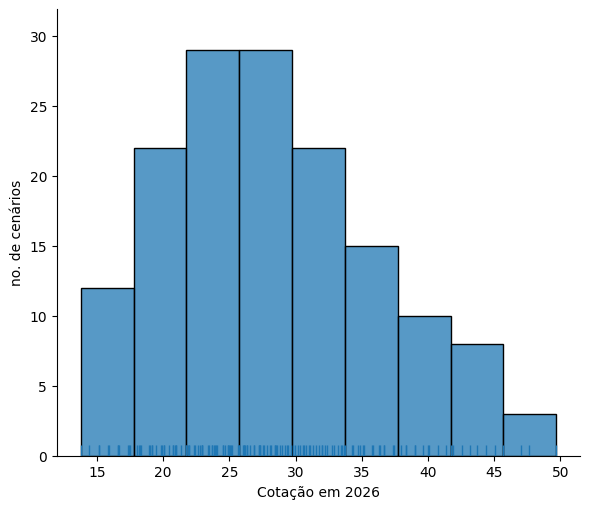

In [24]:
g = sns.displot(cotacoes, rug=True, kind='hist', height=5, aspect=1.2);

g.set_axis_labels("Cotação em 2026", "no. de cenários");

print('Mean: {} | Median: {} | Std: {}'.format(round(np.mean(cotacoes), 2), round(np.median(cotacoes), 2), round(np.std(cotacoes), 2)))

## 1.4 Distribution of possible returns

In [25]:
# CAGR calculation. Returns a decimal value (not percentage)

def cagr(end_value, start_value, time):
    cagr_ = ((end_value/start_value)**(1/time))-1

    return cagr_

CAGR calculation for each target price

In [26]:
cotacao_atual = 23.82
t = 5 # years

returns = [] # initialize list to store returns

for c in cotacoes:
    returns.append(cagr(c,cotacao_atual,t)*100.0) # store returns as percentage

Plotting distribution chart (of returns)

Mean: 2.83% | Median: 2.75% | Std: 5.83


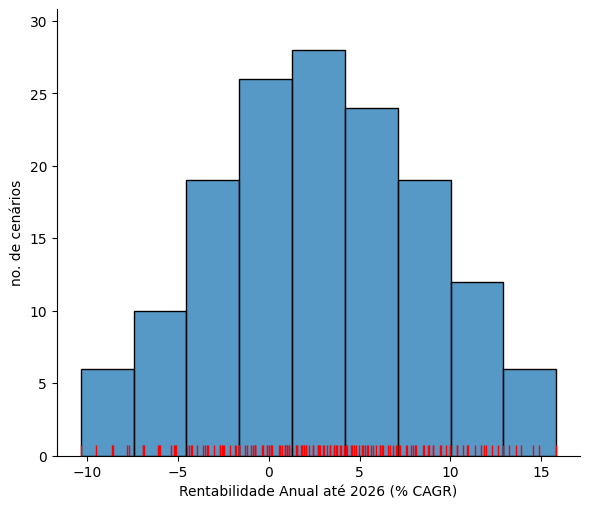

In [27]:
f = sns.displot(
    returns, 
    rug=True, 
    rug_kws={"color": "red", "alpha": 1, "linewidth": 1},
    kind='hist',
    height=5,
    aspect=1.2);

f.set_axis_labels("Rentabilidade Anual até 2026 (% CAGR)", "no. de cenários");

print('Mean: {}% | Median: {}% | Std: {}'.format(round(np.mean(returns), 2), round(np.median(returns), 2), round(np.std(returns), 2)))